In [38]:
import wandb, numpy as np, pandas as pd

api = wandb.Api()
PROJECT = "marawan-gamal/mnist-mtp"
KEY = "val/loss"

rows = []

for run in api.runs(PROJECT):
    vals = []
    for row in run.scan_history(keys=[KEY], page_size=10000):
        v = row.get(KEY)
        if isinstance(v, (int, float)):
            vals.append(float(v))
        elif isinstance(v, str):
            try:
                vals.append(float(v))
            except ValueError:
                pass
    min_val = np.min(vals) if vals else float("nan")
    rows.append({
        "model": run.config["model"],
        "pos_func": run.config["pos_func"],
        "rank": run.config["rank"],
        "val/loss": min_val,
    })

df = pd.DataFrame(rows)

# Renaming
# moe all pos_funcs to softmax
df.loc[df['model'] == 'moe', 'pos_func'] = 'softmax'
print(df)


   model pos_func  rank  val/loss
0     cp      abs    10  0.218586
1    mps      abs    10  0.144189
2    moe  softmax    10  0.203258
3     cp      abs    10  0.222638
4     cp   square    10       NaN
5    moe  softmax    10  0.200855
6     cp      exp    10       NaN
7     cp  sigmoid    10       NaN
8    moe  softmax    64  0.201045
9     cp  sigmoid    64       NaN
10    cp      exp    64       NaN
11    cp   square    64       NaN
12   moe  softmax    10  0.203821
13   moe  softmax    10  0.216756
14    cp   square    10       NaN
15   moe  softmax    64  0.198867
16   moe  softmax    64  0.200210


<Figure size 1000x500 with 0 Axes>

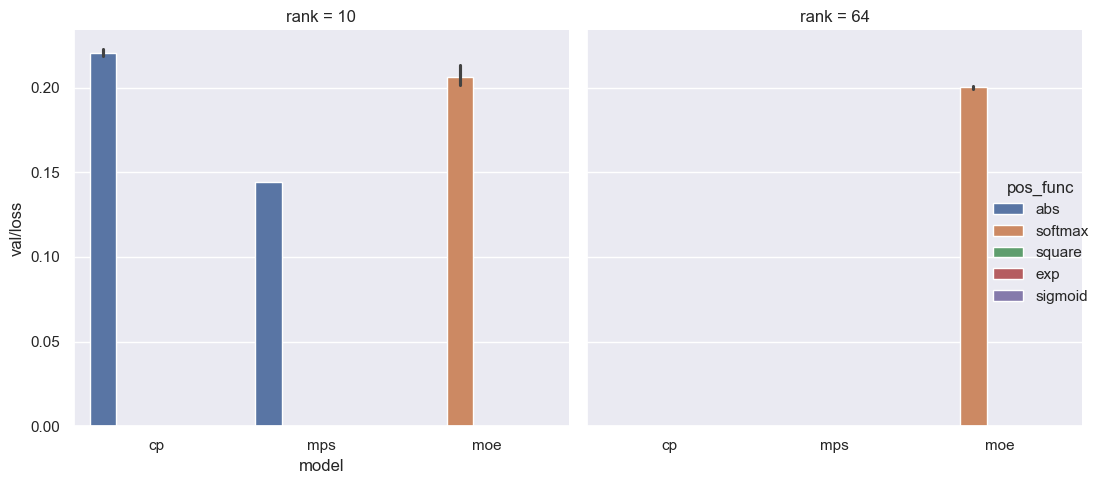

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
g = sns.catplot(
    data=df, 
    x="model",
    y="val/loss", 
    hue="pos_func", 
    col="rank", 
    # col_wrap=3, 
    kind="bar"
)
# g._legend.remove()
plt.ylabel(r"$\min \, \mathcal{L}_{\mathrm{eval}}$")
plt.xlabel("")
# plt.xticks(fontsize=24)
# plt.yticks(fontsize=18)
# plt.legend(fontsize=24, title_fontsize=24, loc='upper left', bbox_to_anchor=(1,1))
# plt.legend([], [], frameon=False)
plt.tight_layout(); plt.show()

In [4]:
pd.DataFrame(rows)

,lr,rank,model,epochs,pos_func,batch_size,max_samples,num_gen_images,val/loss
0,0.001,10,cp,5,abs,32,None,10,NaN
1,0.001,10,mps,5,abs,32,None,10,NaN
2,0.001,10,moe,5,abs,32,None,10,NaN
